# Exporting the GBQ data into CSV format

First we connect to Google Big Query to find our data set "master_post_2010_citation_count". This contains all single authored patents in the USA with the citation counts. 

In [1]:
from google.oauth2 import service_account
import pandas_gbq

from arcgis.gis import GIS
from arcgis import features
import pandas as pd

credentials = service_account.Credentials.from_service_account_file('./4108f9801bf4.json')

In [2]:
#specify the table required
sql = """
SELECT *
FROM `patent-data-querying.query_results.master_post_2010_citation_count`
"""

#use the read method to access the data
df = pandas_gbq.read_gbq(sql, project_id="patent-data-querying", credentials=credentials)
df.shape

(162941, 13)

In [3]:
df.head()

,patent_id,date,title,section_id,inventor_id,location_id,city,state,country,it_cited,cited_by,latitude,longitude
0,9695527,2017-07-04,Universal hand loom kit for weaving and creati...,D,9695527-1,qoalifo107mp,Montpelier,VT,US,25,0,44.26,-72.5758
1,8869569,2014-10-28,Clothes washer demand response with at least o...,D,6932317-2,s71tpw8l6zhb,Louisville,KY,US,123,1,38.2527,-85.7585
2,7926518,2011-04-19,System for support of the cutting bench in a f...,D,4614210-1,hjwymoeaxrtm,None,None,US,10,1,39.8282,-98.5795
3,9580844,2017-02-28,Method for weaving pile fabrics and for config...,D,4614210-1,hjwymoeaxrtm,None,None,US,17,0,39.8282,-98.5795
4,8763184,2014-07-01,Control method of a laundry machine,D,6618887-6,w5qu45ydsu9u,Fremont,CA,US,29,0,37.5483,-121.989


# Create the CSV

I have found the csv file type easier to import into QGIS.

In [4]:
df.to_csv (r'patents.csv')

# Exploratory Stats

Start with the category breakdown, the key can be found [here](https://www.epo.org/searching-for-patents/helpful-resources/first-time-here/classification/cpc.html)

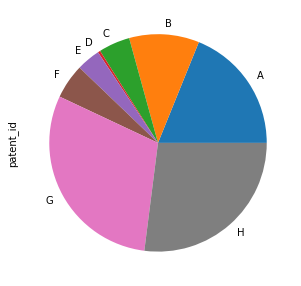

In [16]:
#Section Breakdown
df_section_id = df.groupby('section_id')['patent_id'].nunique()
plot = df_section_id.plot.pie(y='section_id', figsize=(5, 5))
plot